In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import zipfile
import os

# Path to your zip file
zip_path = "archive (4).zip"

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("unzipped_data")

# Check what files got extracted
os.listdir("unzipped_data")


['station_day.csv',
 'city_day.csv',
 'station_hour.csv',
 'city_hour.csv',
 'stations.csv']

In [ ]:
df = pd.read_csv("unzipped_data/city_day.csv")
df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nMissing values per column:\n", df.isnull().sum() )


Shape: (29531, 16)

Columns:
 ['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']

Missing values per column:
 City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [ ]:
# Convert Date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Remove exact duplicate rows
df.drop_duplicates(inplace=True)

# Remove rows that are completely empty
df.dropna(how='all', inplace=True)

print("After cleaning, shape:", df.shape)


After cleaning, shape: (29531, 16)


In [ ]:

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df['AQI_Bucket'] = df['AQI_Bucket'].fillna('Unknown')

In [ ]:
df.describe()


,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,29531,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,2018-05-14 05:40:15.807118080,64.510857,109.659366,16.642601,27.726576,31.063568,20.813789,2.153872,13.830897,33.994121,2.859874,7.140485,1.788420,158.781552
min,2015-01-01 00:00:00,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,2017-04-16 00:00:00,32.150000,79.315000,6.210000,12.980000,14.670000,12.040000,0.540000,6.090000,20.740000,0.240000,1.280000,0.980000,88.000000
50%,2018-08-05 00:00:00,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,2019-09-03 00:00:00,72.450000,111.880000,17.570000,34.665000,36.015000,21.755000,1.380000,13.810000,42.730000,2.420000,6.020000,0.980000,179.000000
max,2020-07-01 00:00:00,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000
std,NaN,59.807551,72.324020,21.506064,23.050531,29.477748,21.028862,6.724660,17.005647,20.202304,14.252822,17.224737,4.062039,130.272413


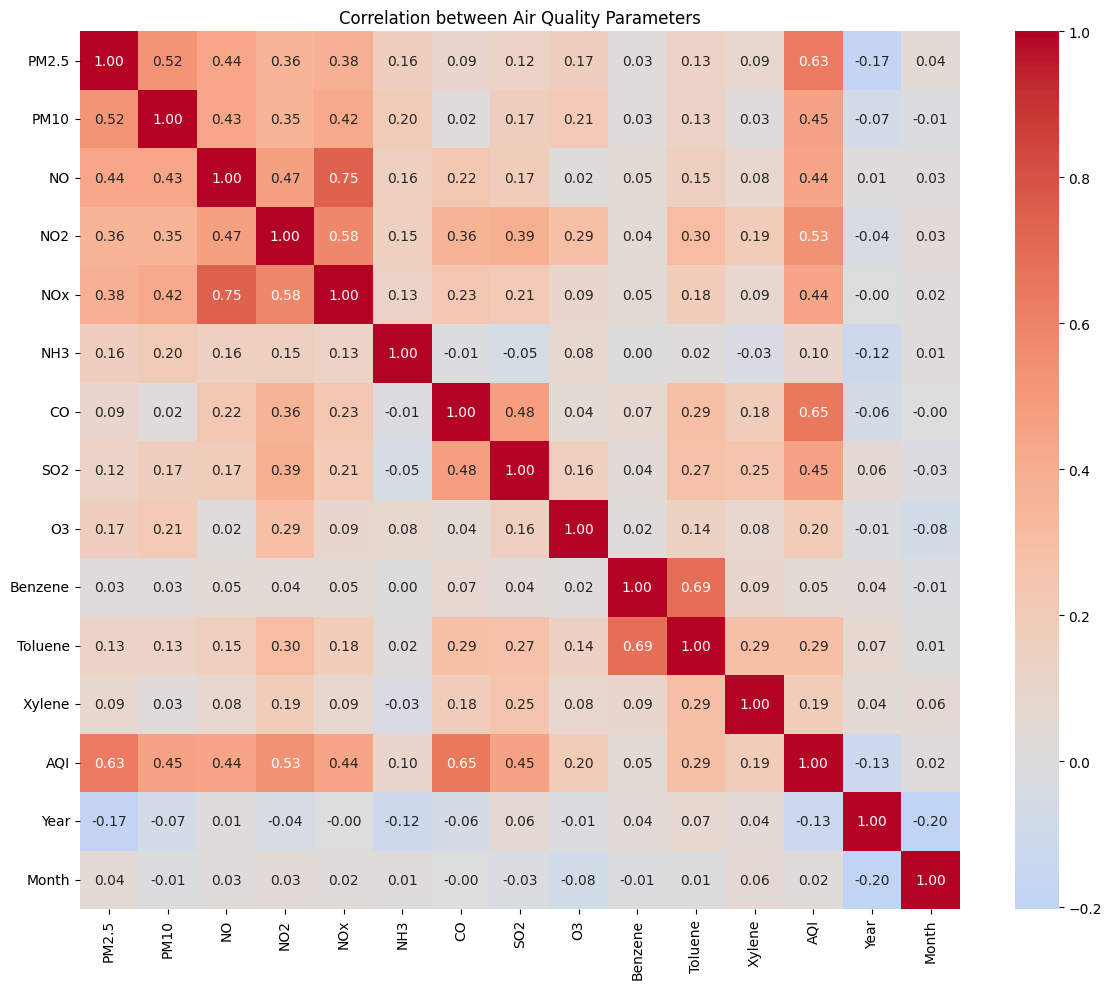

In [ ]:

numeric = df.select_dtypes(include='number').drop('Date', errors='ignore')
corr = numeric.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation between Air Quality Parameters")
plt.tight_layout()
plt.show()

In [ ]:
# Extract time-based features from Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['YearMonth'] = df['Date'].dt.to_period('M')

print("Added time features for analysis")
print(f"Data range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Years covered: {df['Year'].unique()}")

Added time features for analysis
Data range: 2015-01-01 00:00:00 to 2020-07-01 00:00:00
Years covered: [2015 2016 2017 2018 2019 2020]


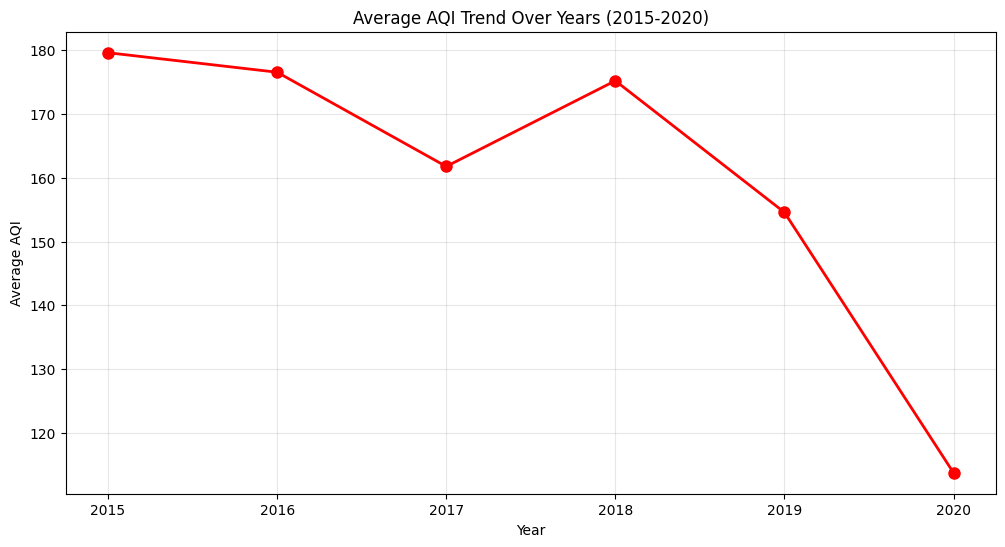

Yearly Average AQI:
  2015: 179.6
  2016: 176.6
  2017: 161.8
  2018: 175.2
  2019: 154.6
  2020: 113.7


In [ ]:
# Yearly AQI trend
plt.figure(figsize=(12, 6))
yearly_trend = df.groupby('Year')['AQI'].mean()
plt.plot(yearly_trend.index, yearly_trend.values, marker='o', linewidth=2, markersize=8, color='red')
plt.title('Average AQI Trend Over Years (2015-2020)')
plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.grid(True, alpha=0.3)
plt.show()

print("Yearly Average AQI:")
for year, aqi in yearly_trend.items():
    print(f"  {year}: {aqi:.1f}")

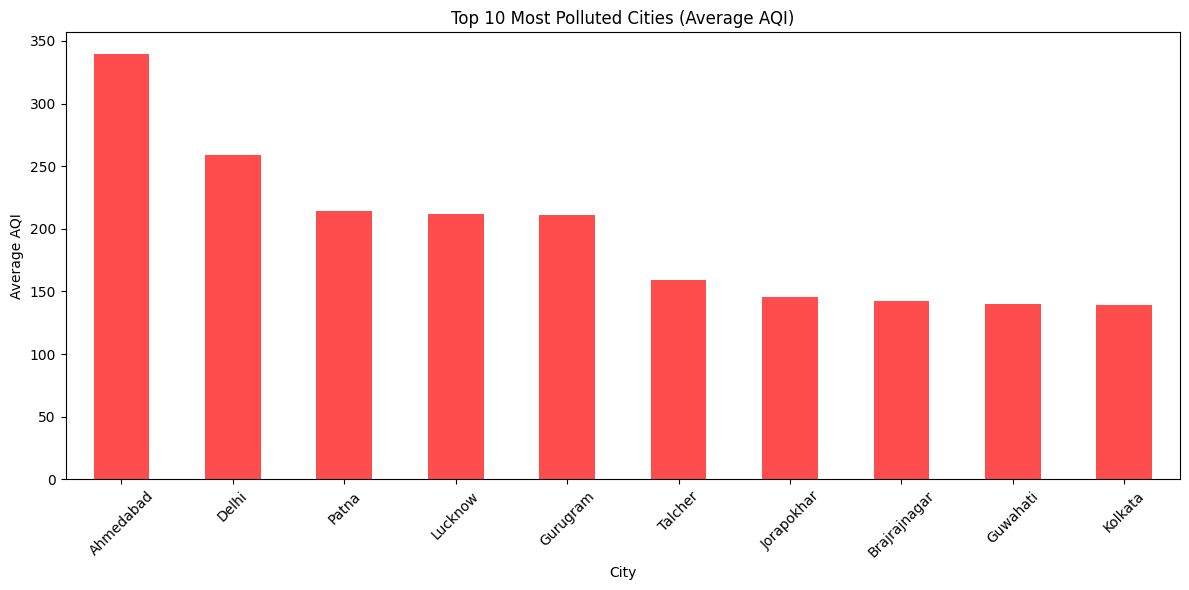

Top 5 Most Polluted Cities:
  1. Ahmedabad: 339.9
  2. Delhi: 258.8
  3. Patna: 214.4
  4. Lucknow: 212.2
  5. Gurugram: 210.7


In [ ]:
# Top 10 most polluted cities
plt.figure(figsize=(12, 6))
city_avg_aqi = df.groupby('City')['AQI'].mean().sort_values(ascending=False).head(10)
city_avg_aqi.plot(kind='bar', color='red', alpha=0.7)
plt.title('Top 10 Most Polluted Cities (Average AQI)')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Top 5 Most Polluted Cities:")
for i, (city, aqi) in enumerate(city_avg_aqi.head().items(), 1):
    print(f"  {i}. {city}: {aqi:.1f}")

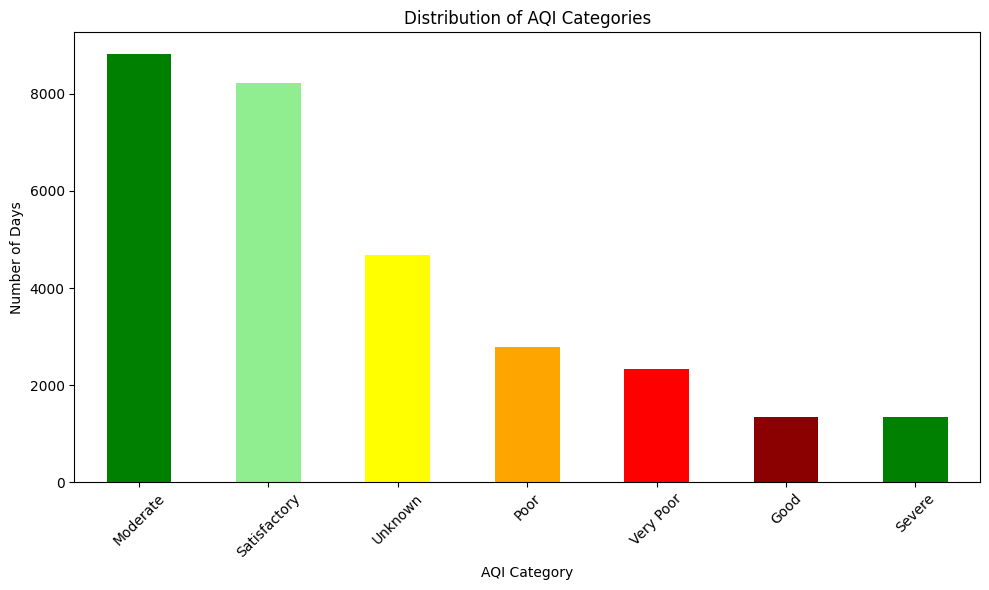

AQI Category Distribution:
  Moderate: 8829 days (29.9%)
  Satisfactory: 8224 days (27.8%)
  Unknown: 4681 days (15.9%)
  Poor: 2781 days (9.4%)
  Very Poor: 2337 days (7.9%)
  Good: 1341 days (4.5%)
  Severe: 1338 days (4.5%)


In [ ]:
# AQI Bucket distribution
plt.figure(figsize=(10, 6))
aqi_distribution = df['AQI_Bucket'].value_counts()
colors = ['green', 'lightgreen', 'yellow', 'orange', 'red', 'darkred']
aqi_distribution.plot(kind='bar', color=colors[:len(aqi_distribution)])
plt.title('Distribution of AQI Categories')
plt.ylabel('Number of Days')
plt.xlabel('AQI Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("AQI Category Distribution:")
for category, count in aqi_distribution.items():
    percentage = (count / len(df)) * 100
    print(f"  {category}: {count} days ({percentage:.1f}%)")

In [ ]:
print("="*60)
print("AIR QUALITY ANALYSIS - KEY FINDINGS")
print("="*60)

# 1. Overall stats
total_days = len(df)
total_cities = df['City'].nunique()
print(f"📊 Dataset Overview: {total_days:,} days across {total_cities} cities")

# 2. Worst and best cities
worst_city = df.groupby('City')['AQI'].mean().idxmax()
worst_aqi = df.groupby('City')['AQI'].mean().max()
best_city = df.groupby('City')['AQI'].mean().idxmin()
best_aqi = df.groupby('City')['AQI'].mean().min()

print(f"🏭 Most Polluted City: {worst_city} (Avg AQI: {worst_aqi:.1f})")
print(f"🌿 Least Polluted City: {best_city} (Avg AQI: {best_aqi:.1f})")

# 3. Worst pollution day
worst_day = df.nlargest(1, 'AQI').iloc[0]
print(f"📅 Worst Air Quality Day: {worst_day['City']} on {worst_day['Date'].strftime('%b %d, %Y')}")
print(f"   AQI: {worst_day['AQI']} ({worst_day['AQI_Bucket']})")

# 4. Most critical pollutants
pollutant_correlations = corr['AQI'].abs().sort_values(ascending=False)
top_pollutant = pollutant_correlations.index[1]  # Skip AQI itself
top_corr = pollutant_correlations.iloc[1]
print(f"💨 Key Pollutant: {top_pollutant} (correlation with AQI: {top_corr:.2f})")

# 5. Trend analysis
first_year_aqi = df[df['Year'] == 2015]['AQI'].mean()
last_year_aqi = df[df['Year'] == 2020]['AQI'].mean()
trend = "improving" if last_year_aqi < first_year_aqi else "worsening"
print(f"📈 5-Year Trend: {trend} (2015: {first_year_aqi:.1f} → 2020: {last_year_aqi:.1f})")

print("="*60)

AIR QUALITY ANALYSIS - KEY FINDINGS
📊 Dataset Overview: 29,531 days across 26 cities
🏭 Most Polluted City: Ahmedabad (Avg AQI: 339.9)
🌿 Least Polluted City: Aizawl (Avg AQI: 36.2)
📅 Worst Air Quality Day: Ahmedabad on Feb 19, 2018
   AQI: 2049.0 (Severe)
💨 Key Pollutant: CO (correlation with AQI: 0.65)
📈 5-Year Trend: improving (2015: 179.6 → 2020: 113.7)
